In [2]:
import time
import pickle

import pandas as pd
import numpy as np

from scipy import stats
from pprint import pprint 

import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import seaborn as sns

%matplotlib inline

In [3]:
basedir = "./pkls/"

In [4]:
sns.set_style("white")
al = 0.5
rstate = "" #"8"
number_clusters = 40

In [5]:
userclustercounts = []
with open(basedir+"clustercounts"+rstate+".txt", 'r') as rc:
    for line in rc:
        countlist = [int(l) for l in line.split()]
        userclustercounts.append(countlist)

In [6]:
print len(userclustercounts), userclustercounts[0]

395145 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]


##Basic summary of cluster stats

In [7]:
bigcounts = []
bigfreqs = []
min_songcount = 20
for ucc in userclustercounts:
    total = float(sum(ucc))
    if total >= min_songcount:
        bigcounts.append(ucc)
        freqs = [c/total for c in ucc]
        bigfreqs.append(freqs)

In [8]:
print len(bigcounts), len(bigfreqs)
print sum(bigcounts[0])
print bigcounts[0]
print bigfreqs[0]

53 53
20
[0, 0, 7, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0.0, 0.0, 0.35, 0.0, 0.1, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.45, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.0, 0.0, 0.0]


In [9]:
def top_n_clusters(freqslist, limit):
    freqsums = []
    for freqs in freqslist:
        sumfreq = sum(sorted(freqs)[-limit:])
        freqsums.append(sumfreq)
    print "Songs per cluster across users with >= %.0f unique song listens" % min_songcount
    print "average of %.2f%% of songs in top %d clusters" % (np.mean(freqsums)*100, limit)
    print "median of %.2f%% of songs in top %d clusters" % (np.median(freqsums)*100, limit)
    print "mode of %.2f%% of songs in top %d clusters" % (stats.mode(freqsums)[0][0]*100, limit)

In [10]:
top_n_clusters(bigfreqs, 1)

Songs per cluster across users with >= 20 unique song listens
average of 20.71% of songs in top 1 clusters
median of 19.05% of songs in top 1 clusters
mode of 19.05% of songs in top 1 clusters


In [11]:
top_n_clusters(bigfreqs, 2)

Songs per cluster across users with >= 20 unique song listens
average of 35.70% of songs in top 2 clusters
median of 33.33% of songs in top 2 clusters
mode of 35.00% of songs in top 2 clusters


In [12]:
top_n_clusters(bigfreqs, 3)

Songs per cluster across users with >= 20 unique song listens
average of 46.60% of songs in top 3 clusters
median of 45.00% of songs in top 3 clusters
mode of 42.86% of songs in top 3 clusters


In [13]:
top_n_clusters(bigfreqs, 4)

Songs per cluster across users with >= 20 unique song listens
average of 55.38% of songs in top 4 clusters
median of 52.94% of songs in top 4 clusters
mode of 50.00% of songs in top 4 clusters


In [14]:
top_n_clusters(bigfreqs, 10)

Songs per cluster across users with >= 20 unique song listens
average of 87.18% of songs in top 10 clusters
median of 85.71% of songs in top 10 clusters
mode of 100.00% of songs in top 10 clusters


##Graph of number of tracks per cluster

In [15]:
trackspercluster = []
with open(basedir+"trackspercluster"+rstate+".txt", 'r') as tc:
    for line in tc:
        trackspercluster.append(int(line.strip()))

In [16]:
print len(trackspercluster), trackspercluster

40 [208, 116, 544, 376, 298, 283, 45, 104, 208, 263, 110, 87, 393, 230, 150, 191, 299, 101, 435, 151, 198, 562, 123, 189, 246, 210, 583, 347, 296, 490, 210, 59, 379, 103, 161, 55, 559, 187, 279, 172]


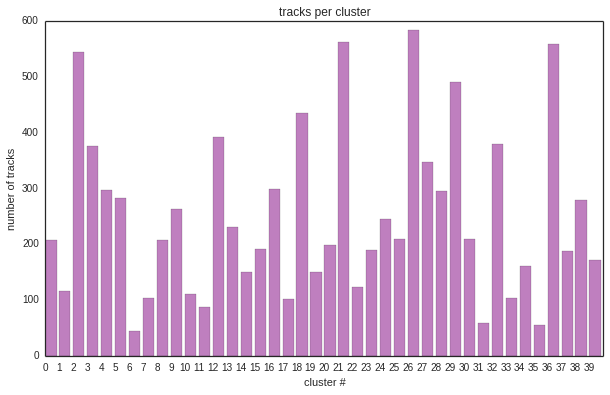

In [36]:
xs = np.arange(number_clusters)
plt.figure(figsize=(10,6))
plt.bar(range(len(trackspercluster)), trackspercluster, color="purple", alpha=al)
plt.title("tracks per cluster")
plt.xlabel("cluster #")
plt.ylabel("number of tracks")
plt.xticks(xs)
plt.show()

##Graph of total listen counts per cluster

note that listens and songs are all from Dec. 2010 or before

In [18]:
ucc_col_totals = [sum(x) for x in zip(*userclustercounts)]

In [19]:
print ucc_col_totals, len(ucc_col_totals)

[1124, 1509, 100149, 35486, 42727, 25943, 2028, 1170, 12611, 1209, 1420, 6914, 7283, 7619, 8857, 10695, 10881, 4836, 37584, 485, 22566, 32104, 1101, 990, 27488, 19915, 45552, 20443, 16594, 14477, 5631, 224, 25525, 2718, 12776, 1265, 90918, 10891, 15443, 12663] 40


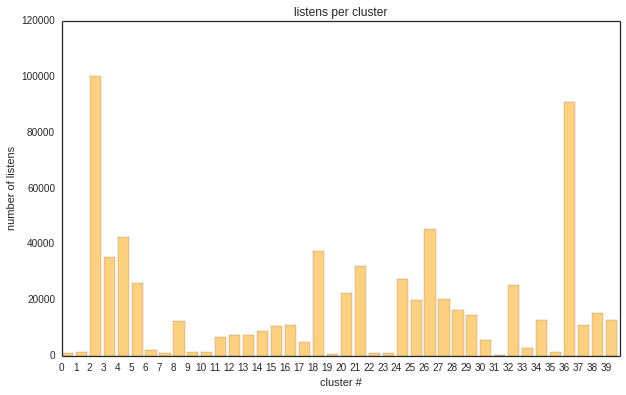

In [20]:
plt.figure(figsize=(10,6))
plt.bar(range(number_clusters), ucc_col_totals, color="orange", alpha=al)
plt.title("listens per cluster")
plt.xlabel("cluster #")
plt.ylabel("number of listens")
plt.xticks(xs)
plt.show()

##Arbitrarily scaled graph to see relative patterns of songs/cluster and total listens/cluster

In [21]:
scale = 150
scaled_tpc = []
for ct in trackspercluster:
    scaled_tpc.append(ct*scale)

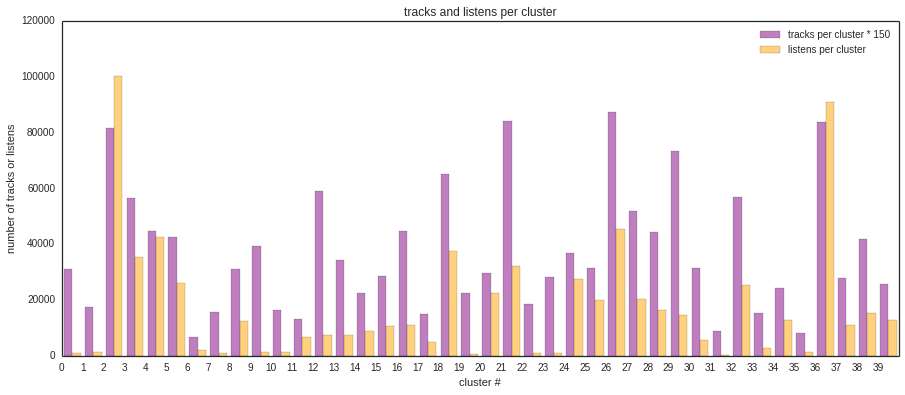

In [22]:
w = 0.4
xs = np.arange(number_clusters)
plt.figure(figsize=(15,6))
plt.bar(xs+0.1, scaled_tpc, color="purple", alpha=al, width=w, label="tracks per cluster * "+str(scale))
plt.bar(xs+w+0.1, ucc_col_totals, color="orange", alpha=al, width=w, label="listens per cluster")
plt.title("tracks and listens per cluster")
plt.xlabel("cluster #")
plt.ylabel("number of tracks or listens")
plt.legend(loc="best")
plt.xticks(xs)
plt.show()

##Graph of average listen frequency per cluster across all users

In [23]:
userclusterfreqs = []
with open(basedir+"clusterfreqs"+rstate+".txt", 'r') as rf:
    for line in rf:
        countlist = [float(l) for l in line.split()]
        userclusterfreqs.append(countlist)

In [24]:
ucf_col_avg = [np.mean(x) for x in zip(*userclusterfreqs)]

In [25]:
print ucf_col_avg, len(ucf_col_avg)

[0.0016162886075597521, 0.0022271642506144834, 0.13967641049709303, 0.049642222622004878, 0.061478719178563478, 0.034849246682896032, 0.0029729991738887251, 0.0014924001171185831, 0.017809637333574085, 0.0018118986028865861, 0.0020960086954846802, 0.012189575252355386, 0.0099404320721920812, 0.010464131148653905, 0.012795387275177901, 0.015708107835912158, 0.016007158049428191, 0.0067257204261726624, 0.05173788471457462, 0.00063704365302506545, 0.032097885701226472, 0.045853430006315421, 0.0015393735332617602, 0.0015525303906466824, 0.040802980190564629, 0.02837887779102068, 0.059837197203360039, 0.026467125609944395, 0.025041423923975178, 0.02254340315487878, 0.0077547580569828139, 0.0002840685074105372, 0.037576568685253442, 0.0040726374260130196, 0.019088496826032954, 0.0015615127386467865, 0.13881047735297636, 0.015071083495675269, 0.020923032814031139, 0.018864700402542459] 40


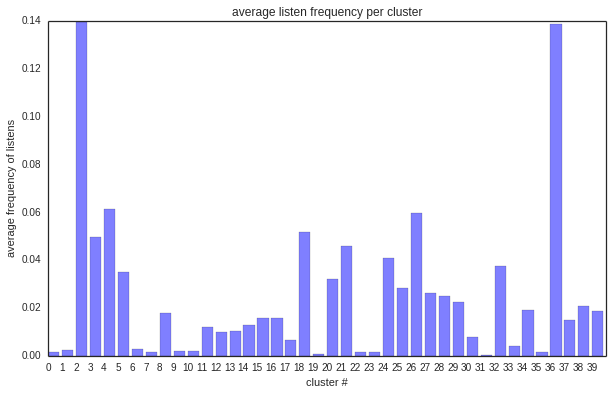

In [26]:
plt.figure(figsize=(10,6))
plt.bar(range(number_clusters), ucf_col_avg, color="blue", alpha=al)
plt.title("average listen frequency per cluster")
plt.xlabel("cluster #")
plt.ylabel("average frequency of listens")
plt.xticks(xs)
plt.show()

##Arbitrarily scaled graph to see relative patterns of all three cluster attributes

In [27]:
freqscale = 700000
scaled_freqs = []
for cf in ucf_col_avg:
    scaled_freqs.append(cf*freqscale)

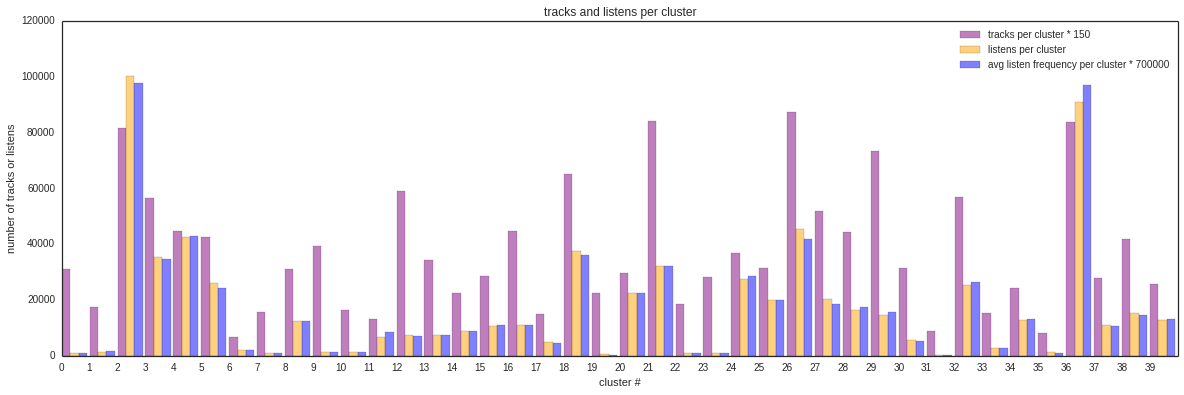

In [28]:
w = 0.3
xs = np.arange(number_clusters)
plt.figure(figsize=(20,6))
plt.bar(xs, scaled_tpc, color="purple", alpha=al, width=w, label="tracks per cluster * "+str(scale))
plt.bar(xs+w, ucc_col_totals, color="orange", alpha=al, width=w, label="listens per cluster")
plt.bar(xs+2*w, scaled_freqs, color="blue", alpha=al, width=w, 
        label="avg listen frequency per cluster * "+str(freqscale))
plt.title("tracks and listens per cluster")
plt.xlabel("cluster #")
plt.ylabel("number of tracks or listens")
plt.legend(loc="best")
plt.xticks(xs)
plt.show()